In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data


In [2]:
dfTrain = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
dfTest = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

# Exploratary Data Analysis


In [3]:
dfTrain.shape

(8693, 14)

In [4]:
dfTrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
dfTrain.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
dfTrain.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
dfTrain["Transported"].astype(int).describe()

count    8693.000000
mean        0.503624
std         0.500016
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Transported, dtype: float64

In [8]:
dfTrain.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [9]:
dfTrain.select_dtypes(include=np.number).columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Age', ylabel='Density'>

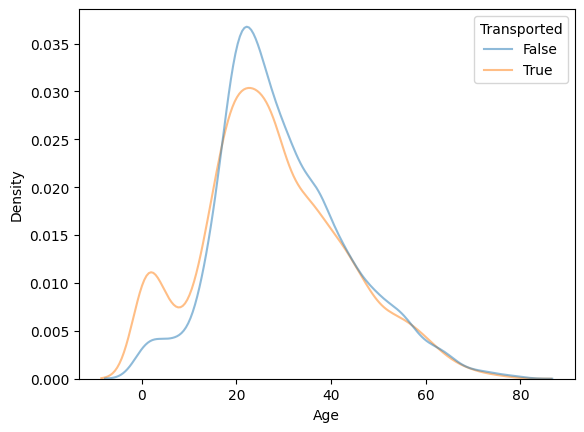

In [10]:
sns.kdeplot(
    data=dfTrain,
    hue="Transported",
    x="Age",
    alpha=0.5,
    common_norm=False,
)

Age has normal distribution.


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this

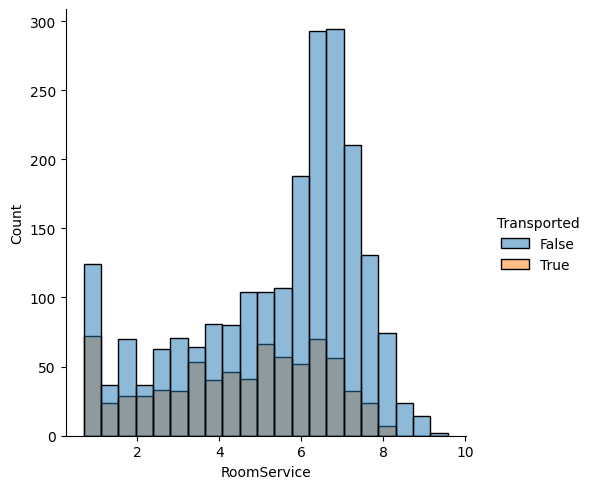

In [11]:
temp = dfTrain[dfTrain["RoomService"] != 0]
sns.displot(x=np.log1p(temp["RoomService"]), hue=temp["Transported"])

Room service was right skewed, but after transforming to log1p, it is normal, also we need a variable to check if it is 0 or not.


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this

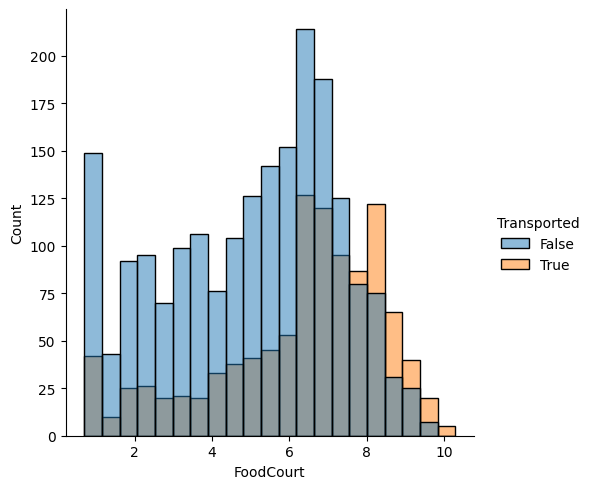

In [12]:
temp = dfTrain[dfTrain["FoodCourt"] != 0]
sns.displot(x=np.log1p(temp["FoodCourt"]), hue=temp["Transported"])

FoodCourt variable needs log transform to be normal and predictive.


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this

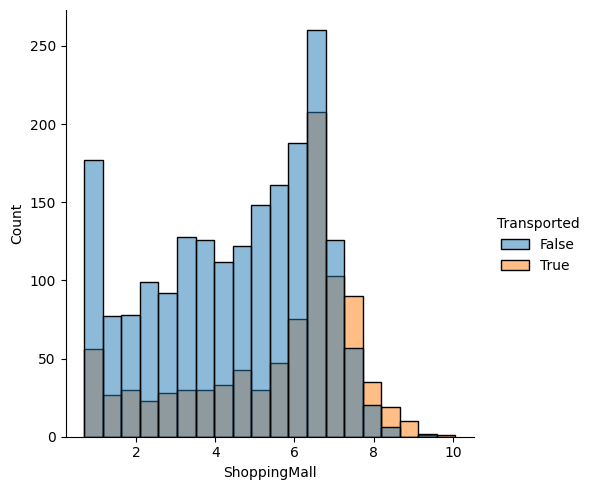

In [13]:
temp = dfTrain[dfTrain["ShoppingMall"] != 0]
sns.displot(x=np.log1p(temp["ShoppingMall"]), hue=temp["Transported"])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this

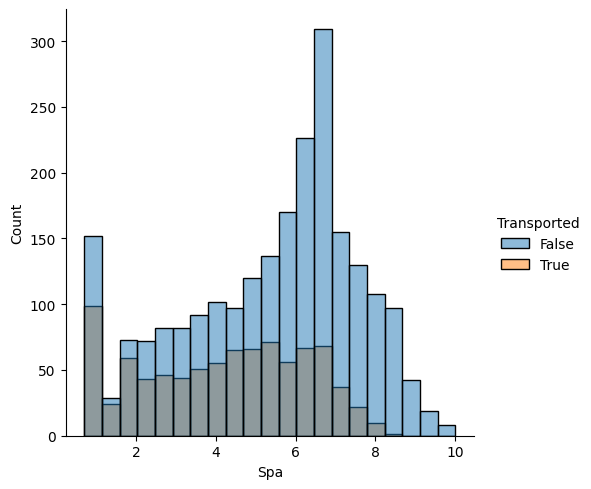

In [14]:
temp = dfTrain[dfTrain["Spa"] != 0]
sns.displot(x=np.log1p(temp["Spa"]), hue=temp["Transported"])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this

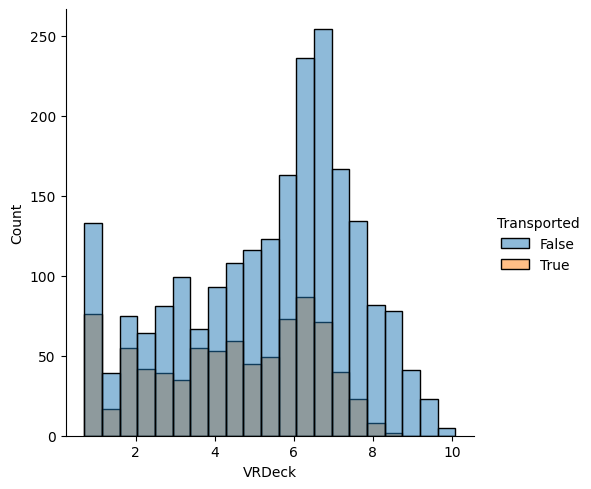

In [15]:
temp = dfTrain[dfTrain["VRDeck"] != 0]
sns.displot(x=np.log1p(temp["VRDeck"]), hue=temp["Transported"])

All of these are good with log transforms, therefore we will apply log to them.


Our progress basically states the following observations now,

-   RoomService -> right skew, x^0.25 to normalise, needs a flag for = 0
-   FoodCourt -> right skew, log1p to normalise, needs a flag for = 0
-   ShoppingMall -> right skew, log1p to normalise, needs a flag for = 0
-   Spa -> right skew, log1p to normalise, needs a flag for = 0
-   VRDeck -> right skew, log1p to normalise, needs a flag for = 0
-   Age -> normal dist, needs binning before using

Also all nulls should be filled with zero except age, which should be filled with median instead.  
Now we will move on with categorical data


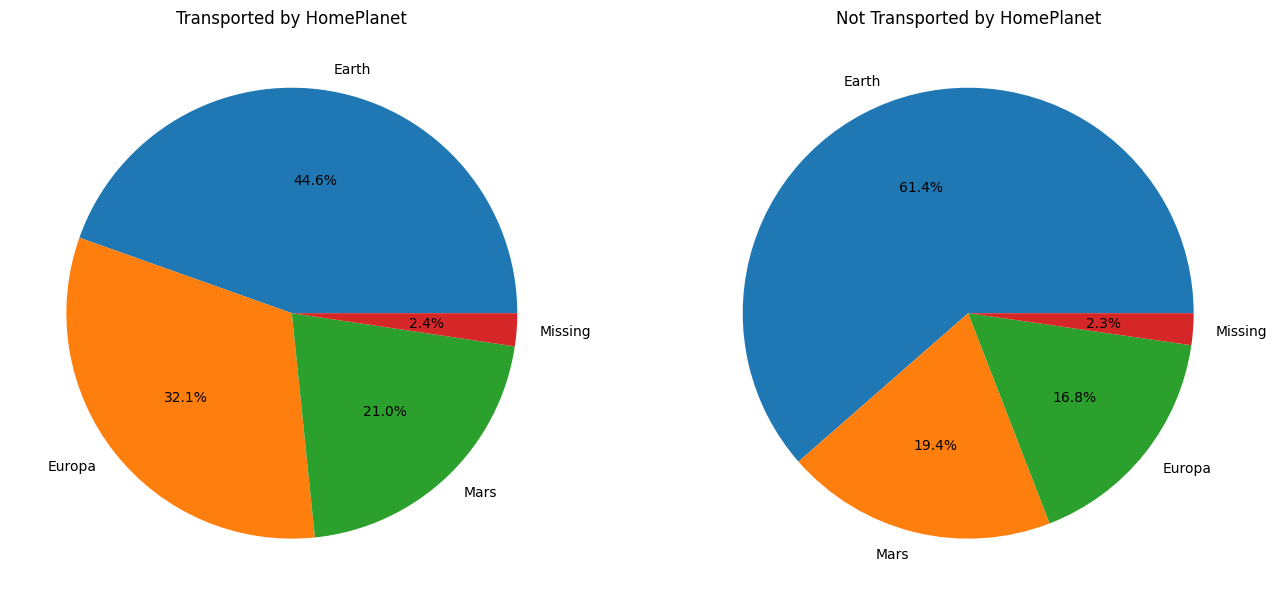

In [16]:
def plotCategory(category):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    dfList = [
        dfTrain[dfTrain["Transported"] == True],
        dfTrain[dfTrain["Transported"] == False],
    ]

    for i, dfTemp in enumerate(dfList):

        counts = dfTemp[category].value_counts(dropna=False)
        sizes = counts.values
        labels = counts.index.astype(str).to_list()
        labels = ["Missing" if label == "nan" else label for label in labels]

        axes[i].pie(
            x=sizes,
            labels=labels,
            autopct="%1.1f%%",
        )
        axes[i].set_title(
            f"Transported by {category}" if i == 0 else f"Not Transported by {category}"
        )


plotCategory("HomePlanet")

People from earth are generally not transported.  
Europa and Mars is generally positive.  
We can fill missing by the mode (probably earth) here.


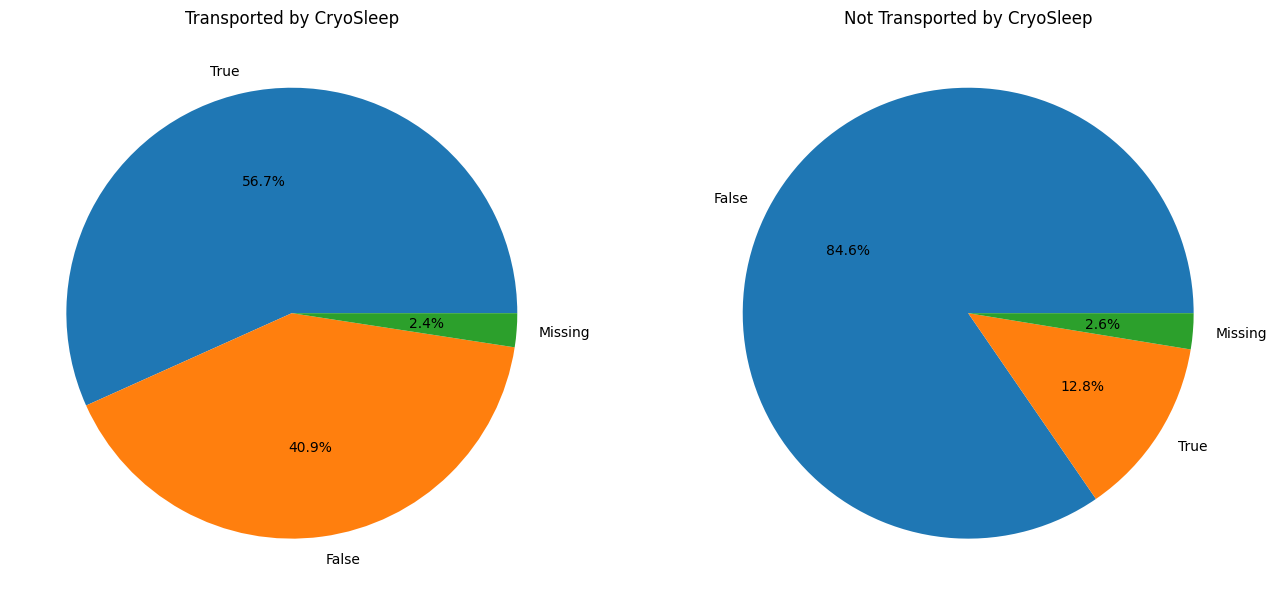

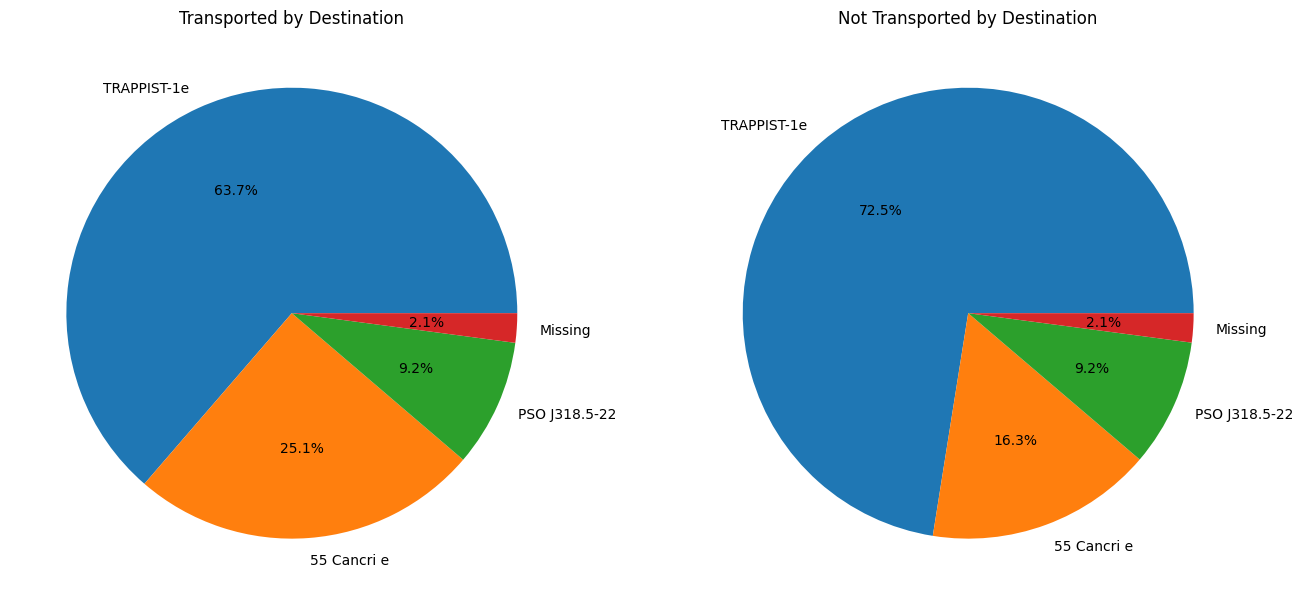

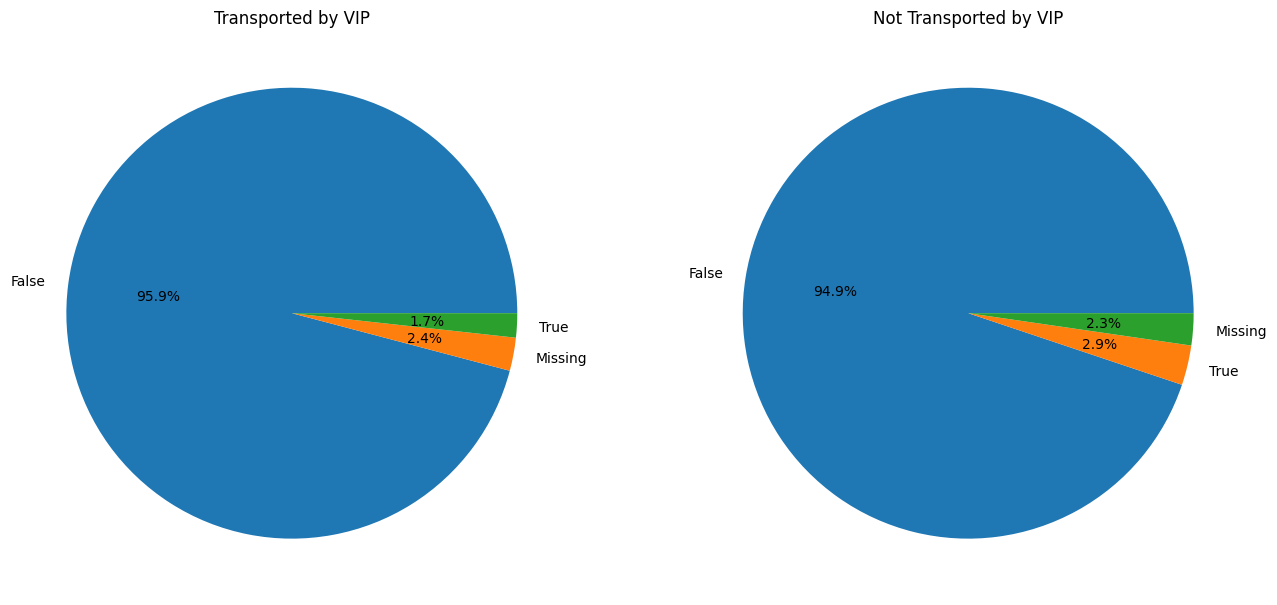

In [17]:
plotCategory("CryoSleep")
plotCategory("Destination")
plotCategory("VIP")

We can fill all of the categorical datas with the mode, because it is small portion of the data and it is not predictive by itself.


In [18]:
numericCols = dfTrain.select_dtypes(include=np.number).columns

Now I will calculate survival rate of each group, I think it is predictive for others at the same group


In [19]:
def getCabinParts(df: pd.DataFrame):
    df["Cabin"] = df["Cabin"].fillna("Missing/9999/Missing")
    cabinParts = df["Cabin"].str.split("/", expand=True)
    df["Deck"] = cabinParts[0].astype("category")
    df["Num"] = cabinParts[1].astype(int)
    df["Side"] = cabinParts[2].astype("category")

    return df.drop(columns="Cabin", errors="ignore")


dfTrain = getCabinParts(dfTrain)
dfTest = getCabinParts(dfTest)

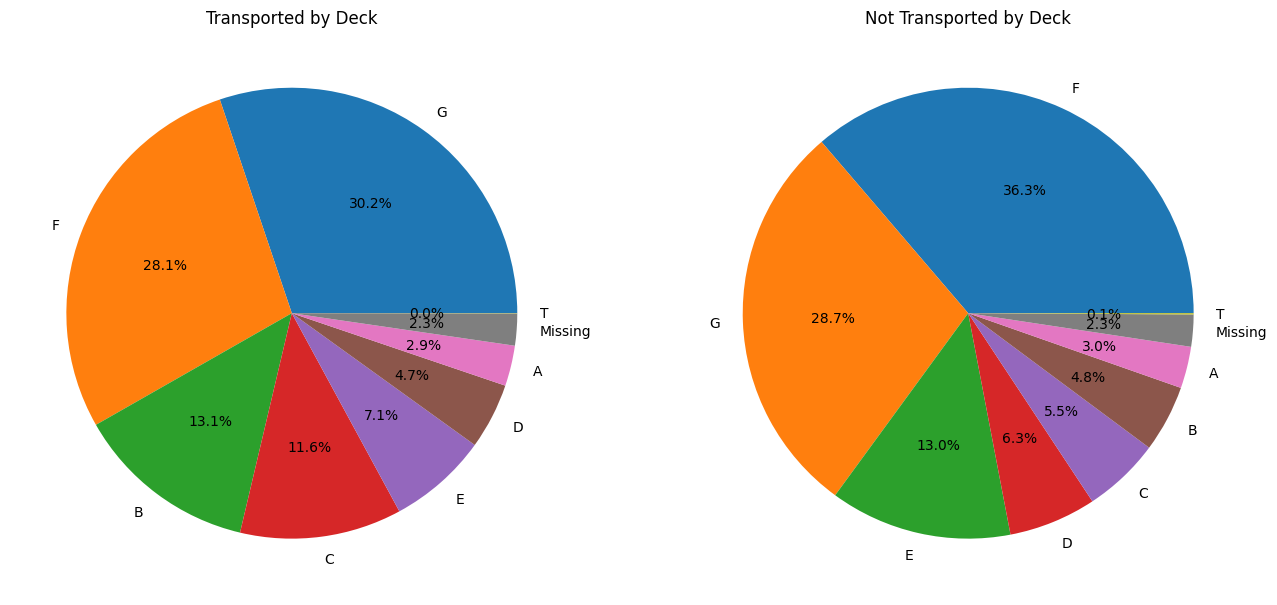

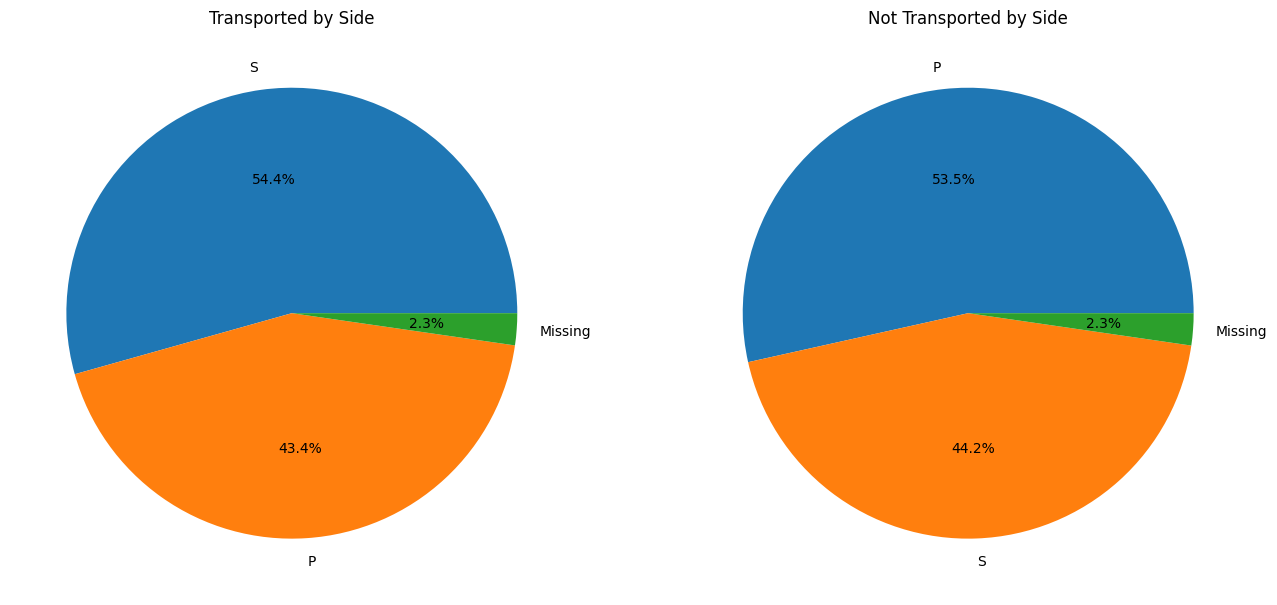

In [20]:
plotCategory("Deck")
plotCategory("Side")

Now I will filter data and find quartiles and create categorical variables from it


In [21]:
allNums = pd.concat([dfTrain["Num"], dfTest["Num"]])
allNums = allNums[allNums != 9999]

boundaries = allNums.describe(percentiles=[0.25, 0.50, 0.75])

mn = boundaries["min"]
mid = boundaries["50%"]
mx = boundaries["max"]

bins = [mn - 1, mid, mx + 1, 9999 + 1]
labels = [
    "Front",
    "Back",
    "Missing_Placeholder",
]

dfTrain["CabinNum_Group"] = pd.cut(
    dfTrain["Num"], bins=bins, labels=labels, include_lowest=True, right=False
)
dfTest["CabinNum_Group"] = pd.cut(
    dfTest["Num"], bins=bins, labels=labels, include_lowest=True, right=False
)

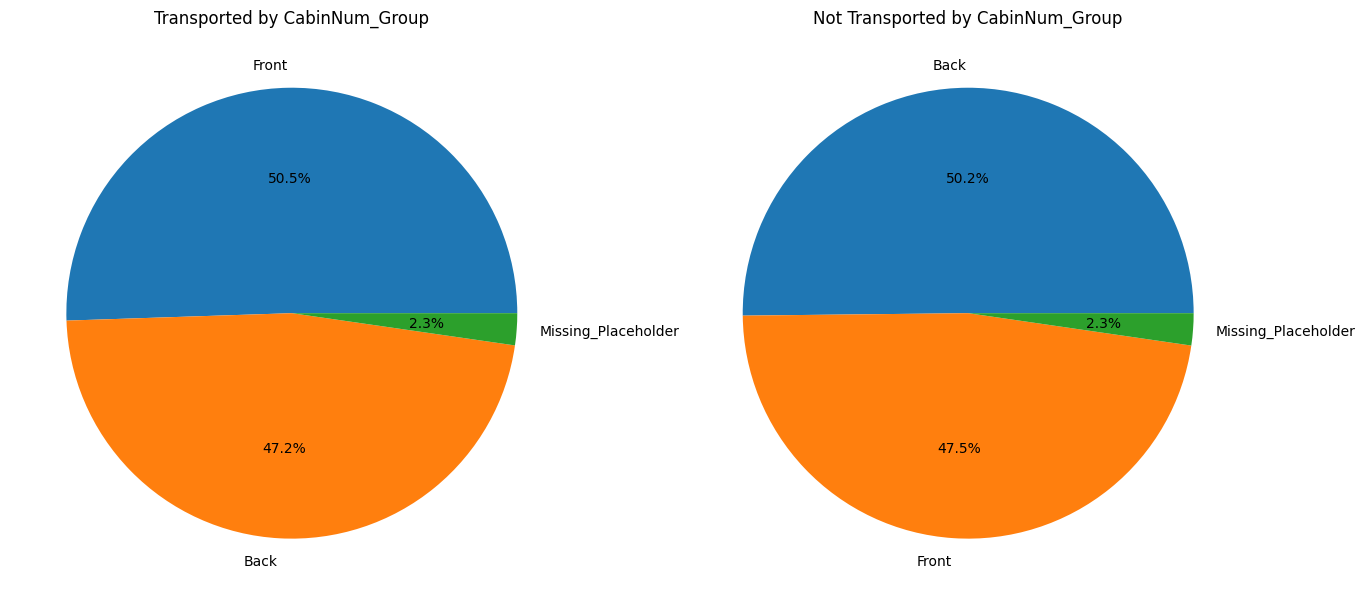

In [22]:
plotCategory("CabinNum_Group")

# Feature Engineering


Our observations were this during our eda for each column

-   Name -> drop
-   Age -> normal dist, need to group to bins

-   RoomService -> right skew, log1p to normalise, needs a flag for = 0
-   FoodCourt -> right skew, log1p to normalise, needs a flag for = 0
-   ShoppingMall -> right skew, log1p to normalise, needs a flag for = 0
-   Spa -> right skew, log1p to normalise, needs a flag for = 0
-   VRDeck -> right skew, log1p to normalise, needs a flag for = 0

-   SUM -> sum of RoomService + FoodCourt + ShoppingMall + Spa + VRDeck, take log1p after sum

-   HomePlanet -> fill with mode
-   CryoSleep -> fill with mode
-   Destination -> fill with mode
-   VIP -> fill with mode

-   Transported -> target variable, also got group survival rate
-   Cabin -> splitted, and grouped the num in 2nd


In [23]:
def getGroupSizeMap():
    ids = pd.concat([dfTrain["PassengerId"], dfTest["PassengerId"]])
    groupIds = ids.str.split("_", expand=True)[0]
    sizes = groupIds.value_counts().to_dict()
    return sizes


def pipeline(df: pd.DataFrame, isOneHot):
    res = df.copy()

    sizeMap = getGroupSizeMap()
    groupIds = res["PassengerId"].str.split("_", expand=True)[0]
    res["GroupSize"] = groupIds.map(sizeMap)
    res["GroupSize"] = res["GroupSize"].fillna(1).astype(int)

    # Fill 0 for the missing money, and calculate total spend

    moneys = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    res[moneys] = res[moneys].fillna(0)
    res["TotalMoneySpend"] = (
        res["RoomService"]
        + res["FoodCourt"]
        + res["ShoppingMall"]
        + res["Spa"]
        + res["VRDeck"]
    )

    # Log transform it to make it normal, and add a flag for whatever if it is 0 or not

    logs = moneys + ["TotalMoneySpend"]

    for col in logs:
        res[f"{col}Log"] = np.log1p(res[col])
        res[f"{col}Zero"] = (res[col] == 0).astype(int)

    # Fill categories with mode

    categoryCols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
    for col in categoryCols:
        modeVal = res[col].mode()[0]
        res[col] = res[col].fillna(modeVal).astype("category")

    # Fill age with median, and make 5 age groups

    res["Age"].fillna(res["Age"].median(), inplace=True)
    res["AgeGroup"] = pd.cut(res["Age"], bins=5, labels=False, include_lowest=True)

    # Drop name and passenger id
    res.drop(columns=["Name", "PassengerId"], inplace=True, errors="ignore")

    if isOneHot:
        res = pd.get_dummies(res, drop_first=True)

    return res


newDf = pipeline(dfTrain, False)
newDf.head()

/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,FoodCourtZero,ShoppingMallLog,ShoppingMallZero,SpaLog,SpaZero,VRDeckLog,VRDeckZero,TotalMoneySpendLog,TotalMoneySpendZero,AgeGroup
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,1,0.000000,1,0.000000,1,0.000000,1,0.000000,1,2
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,3.258097,0,6.309918,0,3.806662,0,6.602588,0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0,0.000000,1,8.812248,0,3.912023,0,9.248021,0,3
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0,5.918894,0,8.110728,0,5.267858,0,8.551981,0,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,0,5.023881,0,6.338594,0,1.098612,0,6.995766,0,1


# Modelling


## Catboost


In [24]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

newDf = pipeline(dfTrain, False)

y = newDf["Transported"]
X = newDf.drop("Transported", axis=1)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

catFeatures = X.select_dtypes(include=["category"]).columns.tolist()

model = CatBoostClassifier(
    iterations=4000,
    learning_rate=0.015,
    depth=7,
    l2_leaf_reg=3.0,
    grow_policy="Lossguide",
    loss_function="Logloss",
    eval_metric="Accuracy",
    random_seed=42,
    verbose=0,
    cat_features=catFeatures,
)

model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100)

/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

In [25]:
from sklearn.metrics import accuracy_score

preds = model.predict_proba(X_val)[:, 1]
yPred = (preds > 0.50).astype(int)


validation_accuracy = accuracy_score(y_val, yPred)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Validation Accuracy: 0.8033


In [26]:
ids = dfTest["PassengerId"].copy()
newTest = pipeline(dfTest, False)

probs1 = model.predict_proba(newTest)[:, 1]
preds = (probs1 > 0.5).astype(bool)

submission_df = pd.DataFrame({"PassengerId": ids, "Transported": preds})

submission_df.to_csv("Catboost-2.csv", index=False)

/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

We got 0.79658 with this.


## Ridge Regression


In [27]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler

newDf = pipeline(dfTrain, True)
X = newDf.drop("Transported", axis=1)
y = dfTrain["Transported"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = RidgeClassifier(alpha=1.0, random_state=42)
model.fit(X_scaled, y)

newTest = pipeline(dfTest, True)
newTest_scaled = scaler.fit_transform(newTest)

ids = dfTest["PassengerId"].copy()
probs2 = model.decision_function(newTest_scaled)
preds = (probs2 > 0).astype(bool)

submission_df = pd.DataFrame({"PassengerId": ids, "Transported": preds})
submission_df.to_csv("Ridge-1.csv", index=False)

/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

## Logistic Regression


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
import pandas as pd
import numpy as np

newDf = pipeline(dfTrain, True)
X = newDf.drop("Transported", axis=1)
y = newDf["Transported"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(C=0.1, solver="liblinear", random_state=42)
model.fit(X_scaled, y)

newTest = pipeline(dfTest, True)
newTest_scaled = scaler.transform(newTest)

ids = dfTest["PassengerId"].copy()
probs2 = model.predict_proba(newTest_scaled)[:, 1]
preds = (probs2 > 0.5).astype(bool)

submission_df = pd.DataFrame({"PassengerId": ids, "Transported": preds})
submission_df.to_csv("LogisticRegression-1.csv", index=False)

/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

newDf = pipeline(dfTrain, False)
X = newDf.drop("Transported", axis=1)
y = newDf["Transported"]

newTest = pipeline(dfTest, False)

categoricalCols = X.select_dtypes(include=["category", "object"]).columns.tolist()


le = LabelEncoder()

for col in categoricalCols:
    trainValues = X[col].astype(str)
    testValues = newTest[col].astype(str)
    combined = pd.concat([trainValues, testValues], axis=0)
    le.fit(combined)

    X[col] = le.transform(trainValues)
    newTest[col] = le.transform(testValues)


model = RandomForestClassifier(
    n_estimators=500, max_depth=10, min_samples_leaf=5, random_state=42, n_jobs=-1
)

model.fit(X, y)

ids = dfTest["PassengerId"].copy()

probs3 = model.predict_proba(newTest)[:, 1]
preds = (probs3 > 0.5).astype(bool)

submission_df = pd.DataFrame({"PassengerId": ids, "Transported": preds})
submission_df.to_csv("RandomForest-1.csv", index=False)

/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

## Ensembling


In [30]:
ensambleProbs = (
    (probs1 * 0.50)  # Catboost
    + (probs3 * 0.30)  # Random Tree
    + (probs2 * 0.20)  # Logistic Regression
)

ensamblePreds = (ensambleProbs > 0.5).astype(bool)

ids = dfTest["PassengerId"].copy()

submission_df = pd.DataFrame({"PassengerId": ids, "Transported": ensamblePreds})

submission_df.to_csv("Ensemble_Submission-2.csv", index=False)

## Catboost with optuna


In [31]:
%pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [32]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import optuna

newDf = pipeline(dfTrain, False)

y = newDf["Transported"]
X = newDf.drop("Transported", axis=1)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

catFeatures = X.select_dtypes(include=["category"]).columns.tolist()


def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 500, 4000),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.1, log=True),
        "depth": trial.suggest_int("depth", 4, 8),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "grow_policy": trial.suggest_categorical(
            "grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]
        ),
        "random_strength": trial.suggest_float("random_strength", 0.1, 10),
        "loss_function": "Logloss",
        "eval_metric": "Accuracy",
        "verbose": 0,
        "random_seed": 42,
        "cat_features": catFeatures,
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

    preds = model.predict(X_val)
    accuracy = accuracy_score(y_val, preds)

    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
best = study.best_params

/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

Best parameters: {'iterations': 3262, 'learning_rate': 0.09777054592871394, 'depth': 7, 'l2_leaf_reg': 6.110034260442559, 'grow_policy': 'Lossguide', 'random_strength': 3.1195725352166424}


In [33]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import optuna

newDf = pipeline(dfTrain, False)

y = newDf["Transported"]
X = newDf.drop("Transported", axis=1)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

catFeatures = X.select_dtypes(include=["category"]).columns.tolist()


params = {
    **best,
    "loss_function": "Logloss",
    "eval_metric": "Accuracy",
    "verbose": 0,
    "random_seed": 42,
    "cat_features": catFeatures,
}

model = CatBoostClassifier(**params)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

preds = model.predict(X_val)
accuracy = accuracy_score(y_val, preds)

print("Accuracy:", accuracy)

/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

Accuracy: 0.8251868890166763


In [34]:
ids = dfTest["PassengerId"].copy()
newTest = pipeline(dfTest, False)

probs1 = model.predict_proba(newTest)[:, 1]
preds = (probs1 > 0.5).astype(bool)

submission_df = pd.DataFrame({"PassengerId": ids, "Transported": preds})

submission_df.to_csv("Catboost-3.csv", index=False)

/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res[col] = res[col].fillna(modeVal).astype("category")
/tmp/ipykernel_13/3273994002.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

## FINAL ENSEMBLE

In [35]:
ensambleProbs = (
    (probs1 * 0.50)  # Catboost
    + (probs3 * 0.30)  # Random Tree
    + (probs2 * 0.20)  # Logistic Regression
)

ensamblePreds = (ensambleProbs > 0.5).astype(bool)

ids = dfTest["PassengerId"].copy()

submission_df = pd.DataFrame({"PassengerId": ids, "Transported": ensamblePreds})

submission_df.to_csv("Ensemble_Submission-3.csv", index=False)